In [ ]:
# Tried different imputation methods interpolate, mode, median
# imputation methods interpolate, mode gives the same results.
# for the median method performance is slow
#XGB performs better than random forest.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read the respective files from these locations
data_file_training='/data-restricted/PEM/L0162_20200909T0001_20201201T1230.csv'
df = pd.read_csv(data_file_training)
print(df.shape)
print(list(df.columns))

(66331, 46)
['Timestamp', 'BRNDMD', 'WFPILM', 'F_FARFLI', 'F_FARFLO', 'F_FARFL', 'F_W2', 'F_WA36', 'F_WB3Q', 'F_WF36DMD', 'P2SEL', 'PS3SEL', 'T2SEL', 'T3SEL', 'TFLCYCS', 'TFLPDFS', 'TFLIDFS', 'TFLODFS', 'WFINRM', 'WFOTRM', 'WFQPERRCOR', 'A90RH', 'F_WAFL', 'NGGSEL', 'PX36SEL', 'PX36AVAL', 'PX36BVAL', 'NPTSEL', 'NPTREF', 'DWB36PCT', 'REGULATOR', 'T48SEL', 'CDPSEL', 'T8SEL', 'P48SEL', 'LHVSEL', 'SGSEL', 'NOX_HMI', 'CO_HMI', 'O2_HMI', 'VLVFBKG_06', 'EMISSIONS_SS', 'SSFILTER', 'F_WB3', 'NOX15', 'CO15']


In [ ]:
#output_columns=['NOX_HMI', 'CO_HMI'] #compare your predictions with 'NOX15', 'CO15'

In [3]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df=df.set_index('Timestamp')

In [4]:
df[df.columns].apply(lambda x: x.corr(df['CO_HMI']))

BRNDMD          0.497649
WFPILM          0.542715
F_FARFLI       -0.329813
F_FARFLO       -0.565216
F_FARFL         0.625346
F_W2            0.536194
F_WA36          0.524021
F_WB3Q          0.523522
F_WF36DMD       0.503742
P2SEL          -0.224610
PS3SEL          0.509355
T2SEL          -0.002705
T3SEL           0.559404
TFLCYCS         0.609639
TFLPDFS         0.607566
TFLIDFS         0.476199
TFLODFS         0.543248
WFINRM          0.379456
WFOTRM          0.493927
WFQPERRCOR      0.548106
A90RH          -0.171942
F_WAFL          0.485169
NGGSEL          0.572279
PX36SEL         0.512209
PX36AVAL        0.494771
PX36BVAL        0.505996
NPTSEL          0.540816
NPTREF          0.467056
DWB36PCT        0.523450
REGULATOR      -0.675086
T48SEL          0.572176
CDPSEL         -0.480828
T8SEL           0.595082
P48SEL          0.493394
LHVSEL          0.127043
SGSEL          -0.241319
NOX_HMI         0.793344
CO_HMI          1.000000
O2_HMI          0.686464
VLVFBKG_06     -0.349178


In [5]:
df[df.columns].apply(lambda x: x.corr(df['NOX_HMI']))

BRNDMD          0.789382
WFPILM          0.818220
F_FARFLI       -0.437164
F_FARFLO       -0.815788
F_FARFL         0.818661
F_W2            0.812581
F_WA36          0.809606
F_WB3Q          0.353119
F_WF36DMD       0.803396
P2SEL          -0.443865
PS3SEL          0.805211
T2SEL          -0.250926
T3SEL           0.818632
TFLCYCS         0.820989
TFLPDFS         0.822040
TFLIDFS         0.734349
TFLODFS         0.814365
WFINRM          0.687243
WFOTRM          0.803806
WFQPERRCOR      0.810654
A90RH          -0.063455
F_WAFL          0.793595
NGGSEL          0.816182
PX36SEL         0.798704
PX36AVAL        0.785611
PX36BVAL        0.789451
NPTSEL          0.814239
NPTREF          0.794936
DWB36PCT        0.353094
REGULATOR      -0.677457
T48SEL          0.824492
CDPSEL         -0.777380
T8SEL           0.824856
P48SEL          0.801119
LHVSEL         -0.036496
SGSEL          -0.079984
NOX_HMI         1.000000
CO_HMI          0.793344
O2_HMI          0.692898
VLVFBKG_06     -0.090024


In [6]:
cols_with_NaNs=df.columns[df.isnull().any()].tolist()
cols_with_NaNs

['PX36AVAL', 'PX36BVAL', 'EMISSIONS_SS']

In [7]:
df_NaNs=df[cols_with_NaNs]
df_NaNs.describe()

,PX36AVAL,PX36BVAL,EMISSIONS_SS
count,61493.000000,61493.000000,16130.000000
mean,0.312573,0.351047,0.532982
std,0.557965,0.628402,0.498926
min,0.019073,0.019073,0.000000
25%,0.019073,0.019073,0.000000
50%,0.019073,0.019073,1.000000
75%,0.019073,0.019073,1.000000
max,3.074648,3.353121,1.000000


In [8]:
percent_missing=df_NaNs.isnull().sum() * 100/len(df_NaNs)
percent_missing

PX36AVAL         7.293724
PX36BVAL         7.293724
EMISSIONS_SS    75.682562
dtype: float64

array([[<AxesSubplot:title={'center':'PX36AVAL'}>,
        <AxesSubplot:title={'center':'PX36BVAL'}>],
       [<AxesSubplot:title={'center':'EMISSIONS_SS'}>, <AxesSubplot:>]],
      dtype=object)

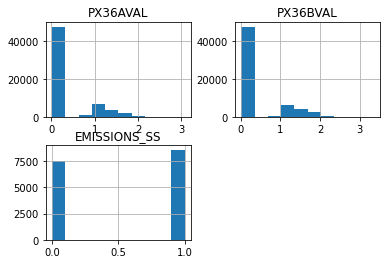

In [9]:
df_NaNs.hist()

In [ ]:
#df['EMISSIONS_SS'].value_counts()
#df['EMISSIONS_SS'].count()

In [ ]:
#Missing values imputation

In [11]:
df1=df.copy()

In [12]:
#since 75% if this variable are NaNs
df.drop(('EMISSIONS_SS'),axis=1,inplace=True)

In [13]:
df_NaNs.describe()

,PX36AVAL,PX36BVAL,EMISSIONS_SS
count,61493.000000,61493.000000,16130.000000
mean,0.312573,0.351047,0.532982
std,0.557965,0.628402,0.498926
min,0.019073,0.019073,0.000000
25%,0.019073,0.019073,0.000000
50%,0.019073,0.019073,1.000000
75%,0.019073,0.019073,1.000000
max,3.074648,3.353121,1.000000


In [ ]:
#df1['EMISSIONS_SS'].plot()

### data imputation for 2 columns

In [14]:
df_NaNs.drop('EMISSIONS_SS',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
df_NaNs = df_NaNs.assign(FillMedian=df['PX36AVAL'].fillna(df['PX36AVAL']).median())

In [20]:
df_NaNs_PX36AVAL=df_NaNs[['PX36AVAL','FillMedian']]
df_NaNs_PX36AVAL.describe()

,PX36AVAL,FillMedian
count,61493.000000,6.633100e+04
mean,0.312573,1.907350e-02
std,0.557965,3.469473e-18
min,0.019073,1.907350e-02
25%,0.019073,1.907350e-02
50%,0.019073,1.907350e-02
75%,0.019073,1.907350e-02
max,3.074648,1.907350e-02


<AxesSubplot:xlabel='Timestamp'>

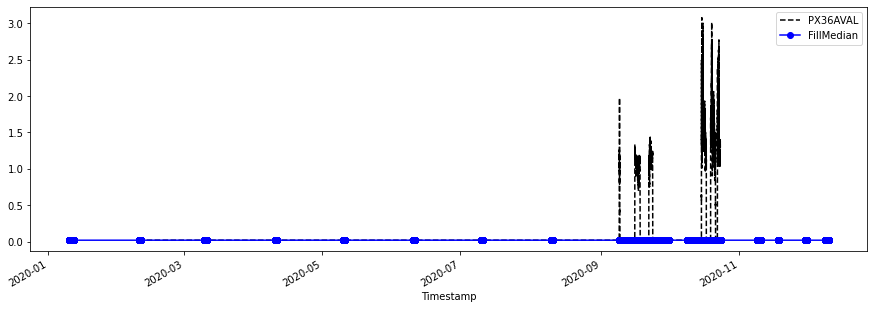

In [30]:
df_NaNs_PX36AVAL.plot(style=['k--', 'bo-'], figsize=(15, 5))

<AxesSubplot:xlabel='Timestamp'>

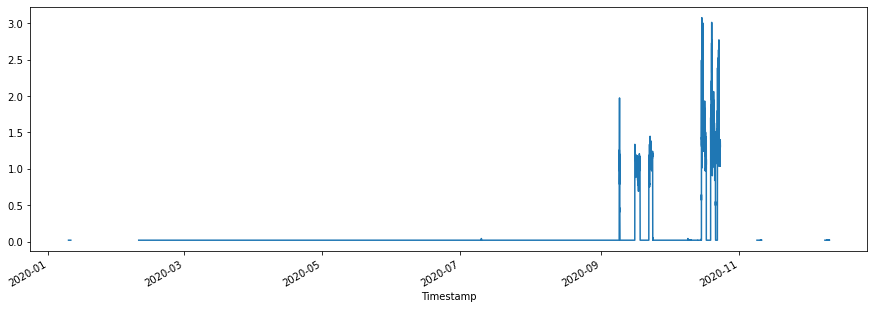

In [27]:
df_NaNs_PX36AVAL['PX36AVAL'].plot(figsize=(15,5))

<AxesSubplot:xlabel='Timestamp'>

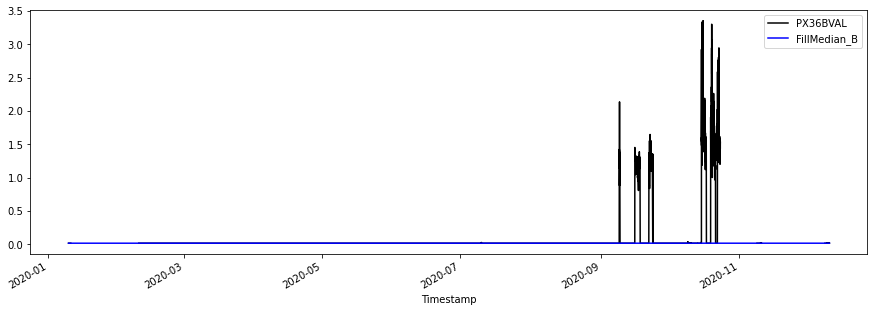

In [36]:
df_NaNs_PX36BVAL.plot(style=['k', 'b-'], figsize=(15, 5))

<AxesSubplot:xlabel='Timestamp'>

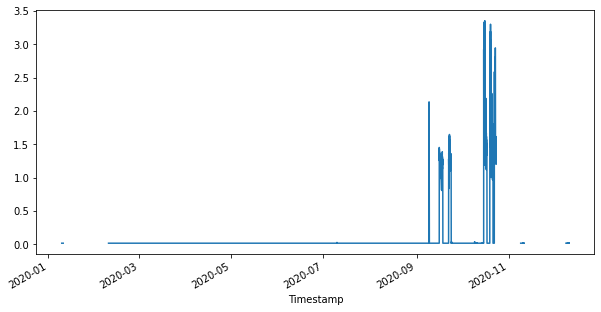

In [34]:
df_NaNs_PX36BVAL['PX36BVAL'].plot(figsize=(10,5))

In [ ]:
df_NaNs.plot(style=['k--', 'bo-', 'r*'], figsize=(10, 5))

In [31]:
df_NaNs = df_NaNs.assign(FillMedian_B=df['PX36BVAL'].fillna(df['PX36BVAL']).median())

In [32]:
df_NaNs_PX36BVAL=df_NaNs[['PX36BVAL','FillMedian_B']]
df_NaNs_PX36BVAL.describe()

,PX36BVAL,FillMedian_B
count,61493.000000,6.633100e+04
mean,0.351047,1.907350e-02
std,0.628402,3.469473e-18
min,0.019073,1.907350e-02
25%,0.019073,1.907350e-02
50%,0.019073,1.907350e-02
75%,0.019073,1.907350e-02
max,3.353121,1.907350e-02


In [37]:

df_NaNs['PX36AVAL_inter']=df['PX36AVAL'].interpolate(method='linear')
df_NaNs['PX36BVAL_inter']=df['PX36BVAL'].interpolate(method='linear')

In [38]:
df_NaNs.describe()

,PX36AVAL,PX36BVAL,FillMedian,FillMedian_B,PX36AVAL_inter,PX36BVAL_inter
count,61493.000000,61493.000000,6.633100e+04,6.633100e+04,66331.000000,66331.000000
mean,0.312573,0.351047,1.907350e-02,1.907350e-02,0.342558,0.383377
std,0.557965,0.628402,3.469473e-18,3.469473e-18,0.574891,0.645162
min,0.019073,0.019073,1.907350e-02,1.907350e-02,0.019073,0.019073
25%,0.019073,0.019073,1.907350e-02,1.907350e-02,0.019073,0.019073
50%,0.019073,0.019073,1.907350e-02,1.907350e-02,0.019073,0.019073
75%,0.019073,0.019073,1.907350e-02,1.907350e-02,0.785828,0.904084
max,3.074648,3.353121,1.907350e-02,1.907350e-02,3.074648,3.353121


In [ ]:
#imputation by interpolate method
# df['PX36AVAL']=df['PX36AVAL'].interpolate(method='linear')
# df['PX36BVAL']=df['PX36BVAL'].interpolate(method='linear')
#There are no null values

In [41]:
df['PX36AVAL'].fillna(df['PX36AVAL'].median(),inplace=True)
df['PX36BVAL'].fillna(df['PX36BVAL'].median(),inplace=True)

In [ ]:
#df.drop(['NOX15','CO15'],axis=1,inplace=True)

In [43]:
# check any duplicates are there
df_duplicates = df[df.duplicated()]
df_duplicates.shape

(4, 44)

In [44]:
df_duplicates
# since the timestamp is different these rows can be included.

,BRNDMD,WFPILM,F_FARFLI,F_FARFLO,F_FARFL,F_W2,F_WA36,F_WB3Q,F_WF36DMD,P2SEL,...,LHVSEL,SGSEL,NOX_HMI,CO_HMI,O2_HMI,VLVFBKG_06,SSFILTER,F_WB3,NOX15,CO15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-09-23 07:21:00,40,4145.062988,0.031654,0.033234,0.033810,138.322082,103.889565,0.001,9553.990234,14.244010,...,21106.19355,0.581417,23.302296,3.763980,14.388108,1,1.0,0.138322,21.129373,21.129373
2020-09-23 07:22:00,40,4145.062988,0.031654,0.033234,0.033810,138.322082,103.889565,0.001,9553.990234,14.244010,...,21106.19355,0.581417,23.302296,3.763980,14.388108,1,1.0,0.138322,21.129373,21.129373
2020-09-24 05:40:00,0,0.000000,0.051119,0.055447,0.000405,2.889691,2.143178,0.001,1.000000,14.567661,...,20999.87232,0.579901,0.005507,-0.095311,20.870802,1,0.0,0.002890,0.413766,0.413766
2020-09-24 05:41:00,0,0.000000,0.051119,0.055447,0.000405,2.889691,2.143178,0.001,1.000000,14.567661,...,20999.87232,0.579901,0.005507,-0.095311,20.870802,1,0.0,0.002890,0.413766,0.413766


In [ ]:
#create a baseline model

In [ ]:
print(list(df.columns))

In [ ]:
#columns=['NOX15', 'CO15','NOX_HMI','CO_HMI']
#drop 'NOX15', 'CO15'
#predict 'NOX_HMI','CO_HMI'

In [ ]:
#right now no need
# df.drop(['NOX15', 'CO15'],axis=1,inplace=True)
# df.shape

In [ ]:
# will split the data to 70:30 for training and testing
0.70*66327

In [45]:
train_df,test_df=df[:46428],df[46428:]
print(train_df.shape,test_df.shape)

(46428, 44) (19903, 44)


In [46]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import math

In [47]:
OUTPUT_COLUMNS=['NOX_HMI','CO_HMI']

In [48]:
train_X=train_df.drop(OUTPUT_COLUMNS,axis=1)
train_y=train_df[OUTPUT_COLUMNS]
test_X=test_df.drop(OUTPUT_COLUMNS,axis=1)
test_y=test_df[OUTPUT_COLUMNS]

In [49]:
print(train_X.shape,train_y.shape,test_X.shape,test_y.shape)

(46428, 42) (46428, 2) (19903, 42) (19903, 2)


In [50]:
print(list(train_X.columns))


['BRNDMD', 'WFPILM', 'F_FARFLI', 'F_FARFLO', 'F_FARFL', 'F_W2', 'F_WA36', 'F_WB3Q', 'F_WF36DMD', 'P2SEL', 'PS3SEL', 'T2SEL', 'T3SEL', 'TFLCYCS', 'TFLPDFS', 'TFLIDFS', 'TFLODFS', 'WFINRM', 'WFOTRM', 'WFQPERRCOR', 'A90RH', 'F_WAFL', 'NGGSEL', 'PX36SEL', 'PX36AVAL', 'PX36BVAL', 'NPTSEL', 'NPTREF', 'DWB36PCT', 'REGULATOR', 'T48SEL', 'CDPSEL', 'T8SEL', 'P48SEL', 'LHVSEL', 'SGSEL', 'O2_HMI', 'VLVFBKG_06', 'SSFILTER', 'F_WB3', 'NOX15', 'CO15']


In [ ]:
# old_pred_tr=train_X[['NOX15', 'CO15']]

# old_pred_test=test_X[['NOX15', 'CO15']]
# print(old_pred_tr.shape,old_pred_test.shape)

In [51]:
# #drop these columns
train_X.drop(['NOX15', 'CO15'],axis=1,inplace=True)
test_X.drop(['NOX15', 'CO15'],axis=1,inplace=True)

In [52]:
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

(46428, 40) (19903, 40) (46428, 2) (19903, 2)


In [53]:
other_params={'learning_rate':0.1,'n_estimators':300,'max_depth':5,'min_child_weight':1,'subsample':0.8,'colsample_bytree':0.8}

In [54]:
multioutputregressor=MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',**other_params)).fit(train_X,train_y)

In [55]:
predictions=multioutputregressor.predict(test_X)

In [56]:
#for test set
print('Root_mean_squared_error_test set',math.sqrt(mean_squared_error(test_y,predictions)))
print('R2 Score_test set',r2_score(test_y,predictions))

Root_mean_squared_error_test set 4.752500495484383
R2 Score_test set 0.9221337083946902


In [ ]:
#find out separately the mean squared error of CO and NO HMIs


In [ ]:
test_y.iloc[0:2]

In [ ]:
predictions[0:2]

In [ ]:
predictions[:,1]

In [59]:
print('Root_mean_squared_error_test set_CO_HMI',math.sqrt(mean_squared_error(test_y['CO_HMI'],predictions[:,1])))
print('R2 Score_test set_CO_HMI',r2_score(test_y['CO_HMI'],predictions[:,1]))

Root_mean_squared_error_test set_CO_HMI 5.930353099896555
R2 Score_test set_CO_HMI 0.8629227265849247


In [60]:
print('Root_mean_squared_error_test set_NOX',math.sqrt(mean_squared_error(test_y['NOX_HMI'],predictions[:,0])))
print('R2 Score_test set_NOX',r2_score(test_y['NOX_HMI'],predictions[:,0]))

Root_mean_squared_error_test set_NOX 3.1628205813333654
R2 Score_test set_NOX 0.9813446902044557


In [ ]:
CO_NO_predictions=pd.DataFrame({'CO_HMI_real':test_y['CO_HMI'],'CO_HMI_predicted':predictions[:,1],'NOX_HMI_real':test_y['NOX_HMI'],'NOX_HMI_predicted':predictions[:,0]})

In [ ]:
CO_NO_predictions.shape

In [ ]:
CO_NO_predictions.tail()

In [ ]:
CO_NO_predictions.plot(figsize=(12,6))

In [ ]:
plt.figure(2)
plt.plot(y)
plt.plot(y_pred_full)
plt.grid(True)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(CO_NO_predictions['CO_HMI_real'], label='CO_Real')
plt.plot(CO_NO_predictions['CO_HMI_predicted'], label='CO_Predicted')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(CO_NO_predictions['NOX_HMI_real'], label='NOX_Real')
plt.plot(CO_NO_predictions['NOX_HMI_predicted'], label='NOX_Predicted')
plt.legend()
plt.show()

# Try Random Forest model

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(train_X, train_y)


In [ ]:
predictions_rf=regr_multirf.predict(test_X)

In [ ]:
#for test set
print('Root_mean_squared_error_test set',math.sqrt(mean_squared_error(test_y,predictions_rf)))
print('R2 Score_test set',r2_score(test_y,predictions_rf))

In [ ]:
print('Root_mean_squared_error_test set_CO_HMI',math.sqrt(mean_squared_error(test_y['CO_HMI'],predictions_rf[:,1])))
print('R2 Score_test set_CO_HMI',r2_score(test_y['CO_HMI'],predictions_rf[:,1]))
print('Root_mean_squared_error_test set_NOX',math.sqrt(mean_squared_error(test_y['NOX_HMI'],predictions_rf[:,0])))
print('R2 Score_test set_NOX',r2_score(test_y['NOX_HMI'],predictions_rf[:,0]))


In [ ]:
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(train_X, train_y)

In [ ]:
predictions_rf_0=regr_rf.predict(test_X)

In [ ]:
#for test set
print('Root_mean_squared_error_test set',math.sqrt(mean_squared_error(test_y,predictions_rf)))
print('R2 Score_test set',r2_score(test_y,predictions_rf))

## ignore these cells 

In [ ]:
# let us check # checking with old predicted values
print('Root_mean_squared_error',math.sqrt(mean_squared_error(train_y,old_pred_tr)))
print('R2 Score',r2_score(train_y,old_pred_tr))

In [ ]:
print('Root_mean_squared_error',math.sqrt(mean_squared_error(test_y,old_pred_test)))
print(r2_score(test_y,old_pred_test))

In [ ]:
#ignore the following cells

In [ ]:
ax=sns.boxplot(data=df_NaNs)

In [ ]:
sns.set_style('darkgrid')
df.plot(kind='line',legend='reverse',title='Visualize')
plt.legend(loc='upper right',shadow=True,bbox_to_anchor=(1.35,1.0))
plt.show